Ta cần làm rõ khái niệm linear model: tuyến tính ở đây không chỉ thể hiện mối quan hệ tuyến tính, mà còn là các hệ số 
    cần tìm của mô hình không bao giờ được nhân hay chia với nhau, tức với mỗi chiều thì chỉ có một hệ số duy nhất của chiều đó.

### Polynomial basis functions

Trick để áp dụng LR vào bộ dl có mqh phi tuyến giữa các biến: biến đổi DL dựa vào *basis functions*.

Ý tưởng là từ dl input x (một chiều), ta xd các biến x1, x2, x3,... cho mô hình tuyến tính đa chiều. Tức, ta xd $x_n = f_n(x)$ với $f_n()$ là một hàm nào đó biến đổi dl một chiều x ban đầu.

VD: Nếu lấy $f_n(x) = x^n$ => mô hình trở thành hồi quy đa thức.

In [ ]:
# polynomial projection, 

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias = False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [ ]:
# the transformer has converted our one-dimensional array into a
# three-dimensional array by taking the exponent of each value. This new, higher-
# dimensional data representation can then be plugged into a linear regression.

In [7]:
from sklearn.pipeline import make_pipeline 
poly_model = make_pipeline(PolynomialFeatures(7), # linear model using 7th-order polynomial basis functions
                           LinearRegression())

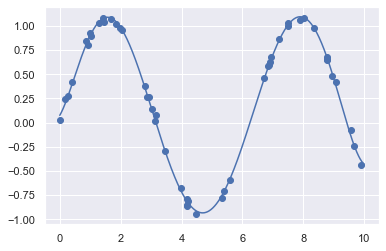

In [9]:
# create a sine wave noise 
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.rand(50)

poly_model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

### Gaussian basis functions

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin 

In [ ]:
class GaussianFeatures(BaseEstimator, TransformerMixin): 
    """Uniformly spaced Gaussian features for one-dimensional input."""
    